# DVA Week 3

In [5]:
# We have not been able to identify any good feature set based on which we could train machine learning models on in the user data
# dataframe. Hence, we shall be doing predictions for oppo_info dataframe only.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
oppo_info = pd.read_csv('opportunity_info_week2.csv')
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness,Skills Count,Completion Rate,Avg Reward Amount,Avg Skill Points Earned,Avg Skills Count
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Dhaka,Savar,Bangladesh,1342,...,0,0,0,0,0,14,0.0,200.0,2.0,14.0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Amritsar,Punjab,Afghanistan,123242,...,0,0,1,0,1,14,0.0,200.0,2.0,14.0
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Satna,Madhya pradesh,India,485001,...,0,0,0,0,0,14,0.0,200.0,2.0,14.0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Hyderabad,Telangana,India,500039,...,0,0,0,0,0,14,0.0,200.0,2.0,14.0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Bangalore,Karnataka,India,560105,...,0,0,0,0,0,14,0.0,200.0,2.0,14.0


## Predicting Reward Amount (Regression)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [121]:
# Define target and features
target = 'Reward Amount'
features = ['Skill Points Earned', 'Skills Count', 'Critical Thinking', 'Creative Thinking',
            'Collaboration', 'Leadership', 'Communication']

In [123]:
# Ensure no missing values in features and target
oppo_info = oppo_info.dropna(subset=[target] + features)

In [125]:
# Split into X (features) and y (target)
X = oppo_info[features]
y = oppo_info[target]

In [127]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 640146.37


In [133]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 800.09


In [135]:
r2 = model.score(X_test, y_test)
print(f"R²: {r2:.2f}")

# An R² close to 1 indicates a good fit.

R²: 0.30


## retraining the model

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Fixed 'auto' issue
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## model eval

In [91]:
# Predict and evaluate using the best model
y_pred_tuned = best_model.predict(X_test)

# Calculate new metrics
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = best_model.score(X_test, y_test)

print(f"Tuned Model - Mean Squared Error (MSE): {mse_tuned:.2f}")
print(f"Tuned Model - Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"Tuned Model - R²: {r2_tuned:.2f}")

Tuned Model - Mean Squared Error (MSE): 638977.41
Tuned Model - Root Mean Squared Error (RMSE): 799.36
Tuned Model - R²: 0.30


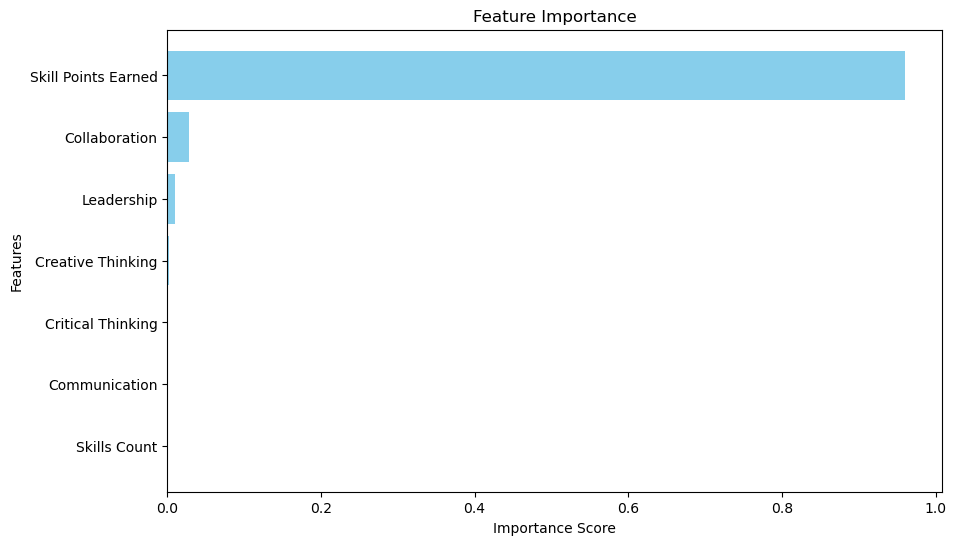

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

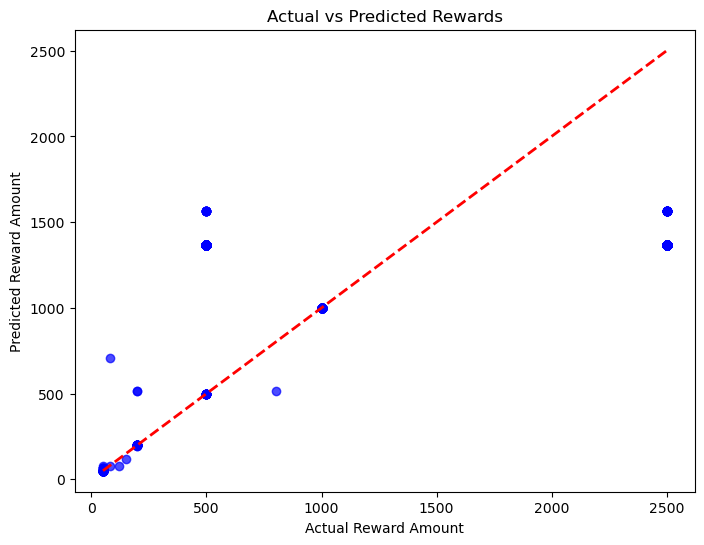

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual Reward Amount')
plt.ylabel('Predicted Reward Amount')
plt.title('Actual vs Predicted Rewards')
plt.show()

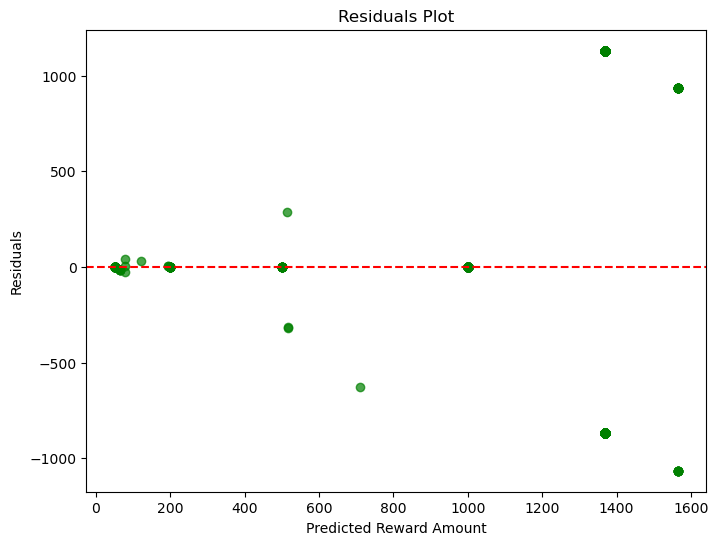

In [79]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Reward Amount')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

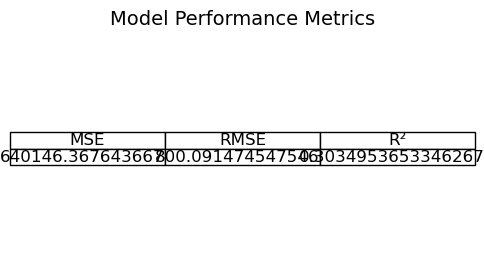

In [81]:
from matplotlib.table import Table

metrics = {
    "Metric": ["MSE", "RMSE", "R²"],
    "Value": [mse, rmse, r2]
}

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=list(metrics.values())[1:], colLabels=metrics["Metric"], loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.title("Model Performance Metrics", fontsize=14)
plt.show()

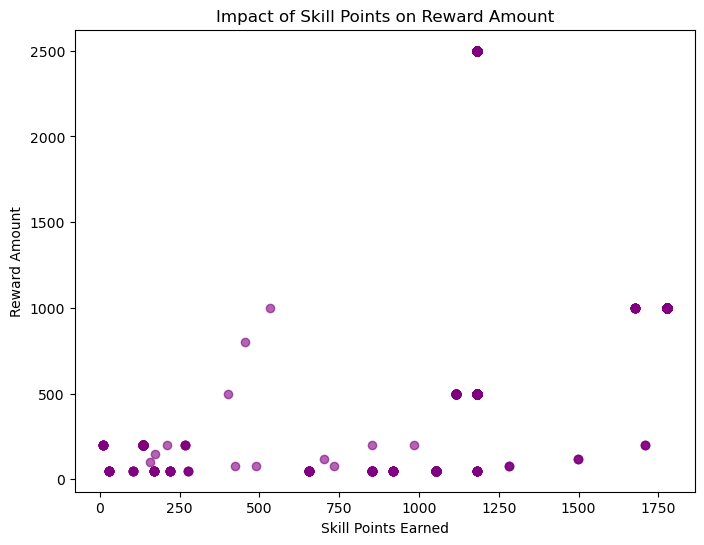

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(oppo_info['Skill Points Earned'], oppo_info['Reward Amount'], alpha=0.6, color='purple')
plt.xlabel('Skill Points Earned')
plt.ylabel('Reward Amount')
plt.title('Impact of Skill Points on Reward Amount')
plt.show()

## Predicting Opportunity Category (Classification)

In [137]:
# Define target and features
target = 'Opportunity Category'
features = ['Skill Points Earned', 'Skills Count', 'Critical Thinking', 'Creative Thinking',
            'Gender', 'City', 'State', 'Country']

In [139]:
# Encode categorical features and target
for col in features + [target]:
    if oppo_info[col].dtype == 'object':
        oppo_info[col] = oppo_info[col].astype('category').cat.codes

In [141]:
# Split into X (features) and y (target)
X = oppo_info[features]
y = oppo_info[target]

In [143]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
 from sklearn.metrics import classification_report

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95        44
           2       1.00      0.74      0.85        23
           3       1.00      1.00      1.00       411

    accuracy                           0.99       489
   macro avg       0.97      0.91      0.94       489
weighted avg       0.99      0.99      0.98       489



In [96]:
# Save entire DataFrame to CSV
oppo_info.to_csv('opportunity_info_week3.csv', index=False)

# Print confirmation
print("Entire user_data DataFrame has been saved to 'opportunity_info_week3.csv'")

Entire user_data DataFrame has been saved to 'opportunity_info_week3.csv'


In [100]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Leadership,Communication,Information Literacy,Career Readiness,Skills Count,Completion Rate,Avg Reward Amount,Avg Skill Points Earned,Avg Skills Count,churn
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1,138,892,0,123242,...,0,1,0,1,14,0.0,200.0,2.000000,14.0,0
5,061389be-8094-47f3-a87b-8bfff80ed3a8,00000000-0GT8-HCVB-01AE-6QEP8Y,Life Beyond Saint Louis University's Campus,0,2022-10-27 18:29:00,0,2214,704,98,63108,...,0,0,0,1,14,0.0,200.0,5.454545,14.0,1
8,31e6a5e7-ed26-4604-b12b-6bf6b37ac05e,00000000-0GT8-HCVB-01AE-6QEP8Y,Life Beyond Saint Louis University's Campus,0,2022-10-27 18:29:00,1,2034,922,70,500102,...,0,0,0,1,14,0.0,200.0,5.454545,14.0,1
9,461e1a5f-a0f6-4457-a364-b3f6e166988a,00000000-0GT8-HCVB-01AE-6QEP8Y,Life Beyond Saint Louis University's Campus,0,2022-10-27 18:29:00,0,1005,1034,42,500074,...,0,0,0,1,14,0.0,200.0,5.454545,14.0,1
11,517b6b5f-c413-4791-b926-97180a5e2936,00000000-0GT8-HCVB-01AE-6QEP8Y,Life Beyond Saint Louis University's Campus,0,2022-10-27 18:29:00,0,282,552,42,560070,...,0,0,0,1,14,0.0,200.0,5.454545,14.0,1


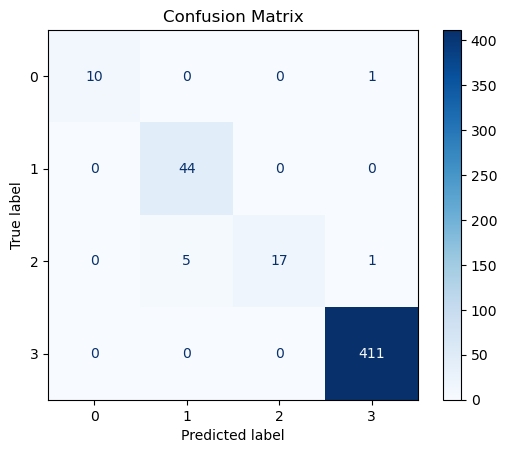

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
plt.show()

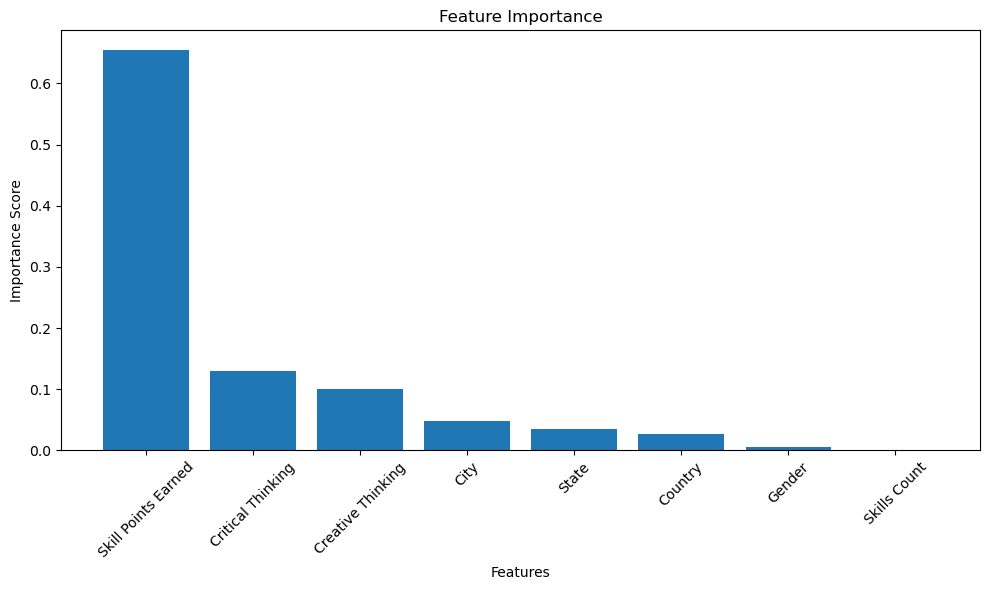

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

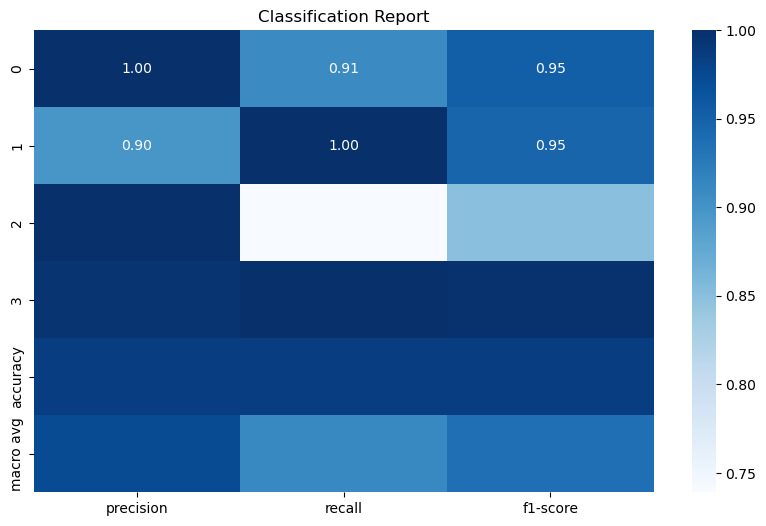

In [157]:
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.show()

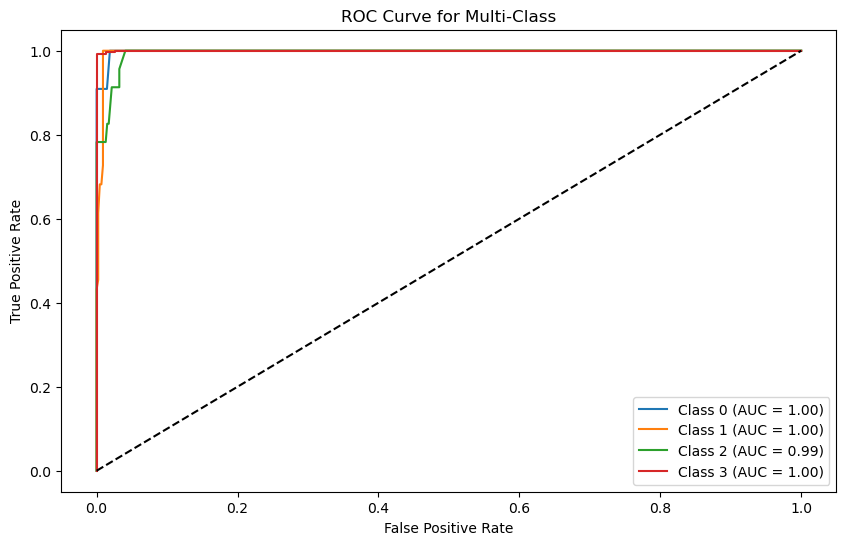

In [159]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Binarize the output for multi-class
y_test_bin = label_binarize(y_test, classes=range(len(model.classes_)))
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve for Multi-Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

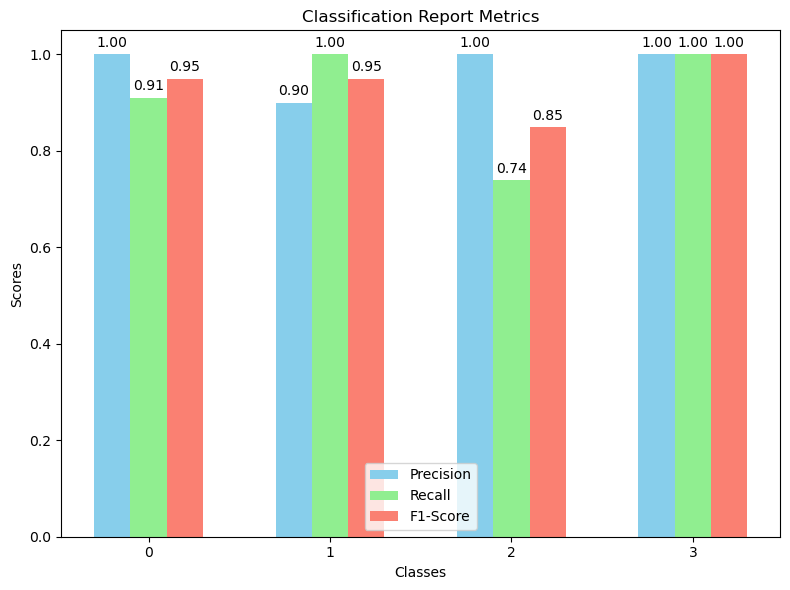

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from your image
classes = ['0', '1', '2', '3']
precision = [1.00, 0.90, 1.00, 1.00]
recall = [0.91, 1.00, 0.74, 1.00]
f1_score = [0.95, 0.95, 0.85, 1.00]

x = np.arange(len(classes))  # Class labels as x-axis locations
width = 0.2  # Bar width

# Create bar plots
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='salmon')

# Add text for labels, title, and axes ticks
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                f'{height:.2f}', ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()